
--- Mid Dataset Dataset ---

Shape: (2050, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SRS_RAW_TOTAL      2050 non-null   int64  
 1   SRS_AWARENESS      2050 non-null   float64
 2   SRS_COGNITION      2050 non-null   float64
 3   SRS_COMMUNICATION  2050 non-null   float64
 4   SRS_MOTIVATION     2050 non-null   float64
 5   SRS_MANNERISMS     2050 non-null   float64
 6   HAS ADHD           2050 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 112.2 KB
None

First 5 rows:
   SRS_RAW_TOTAL  SRS_AWARENESS  SRS_COGNITION  SRS_COMMUNICATION  \
0             38            3.0            7.0               15.0   
1             35            8.0            6.0               15.0   
2             32            5.0            7.0                9.0   
3             68           10.0           15.0              

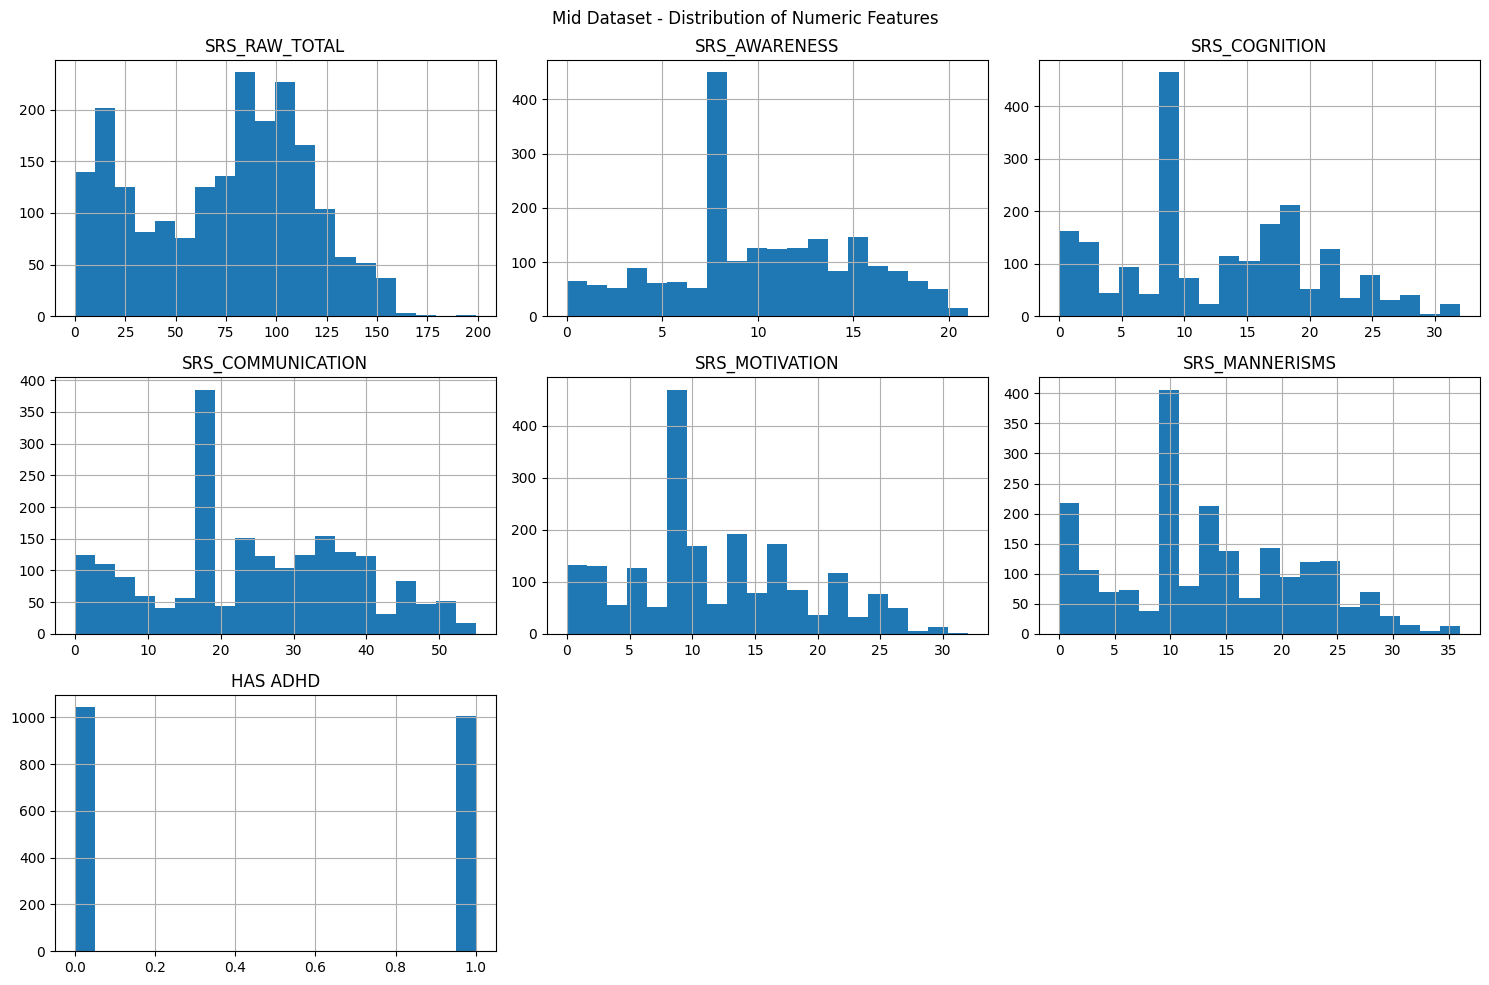

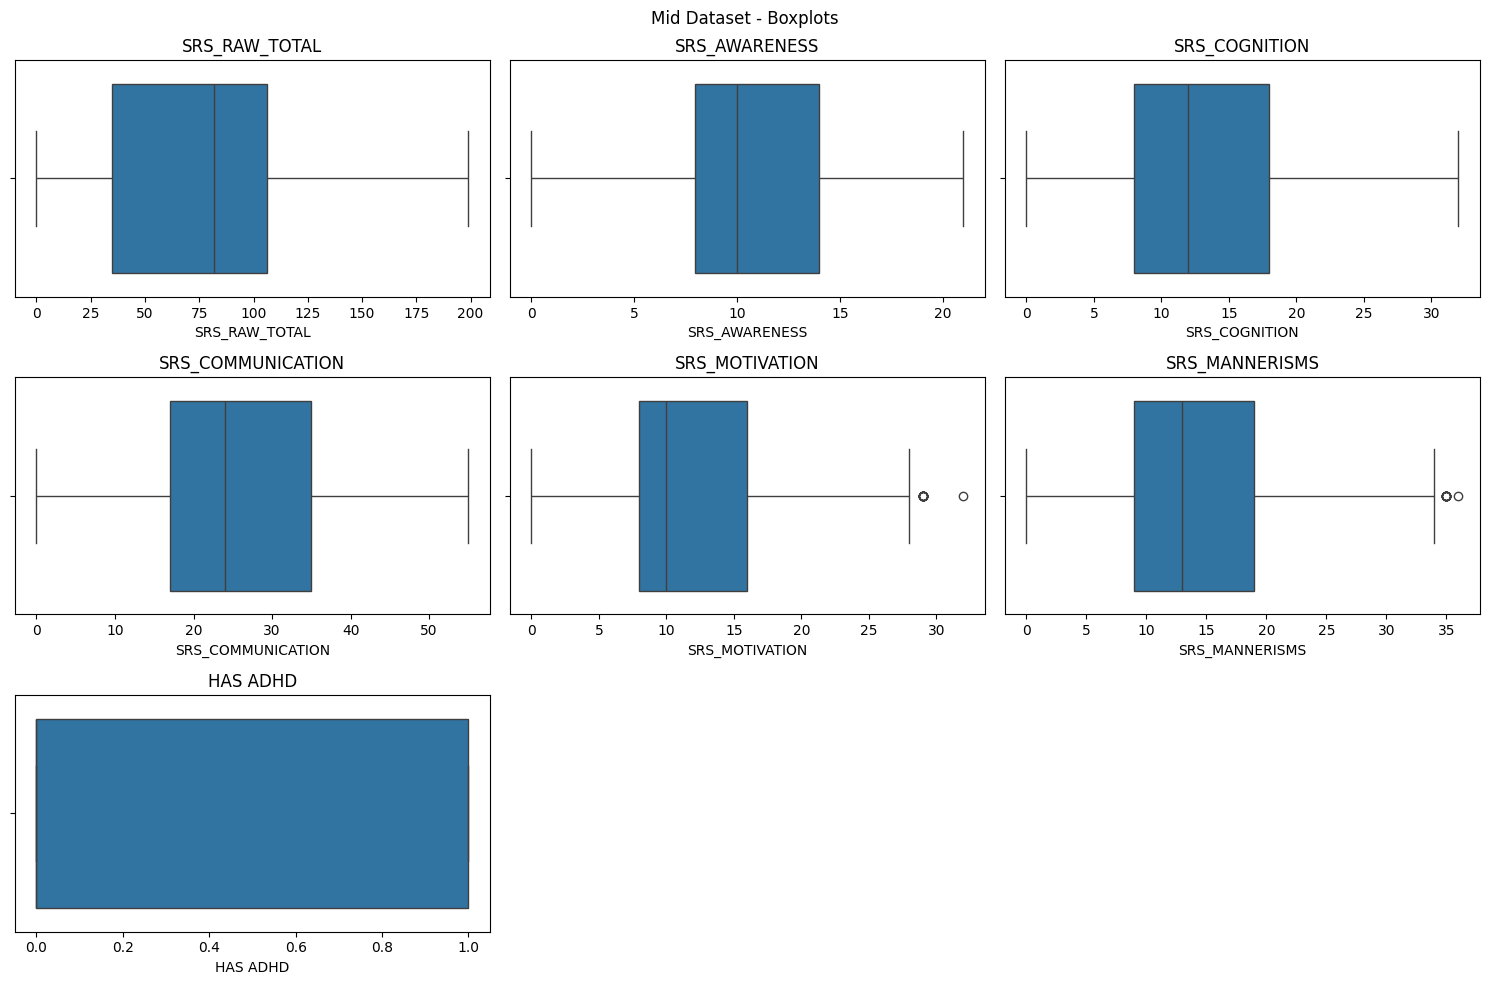

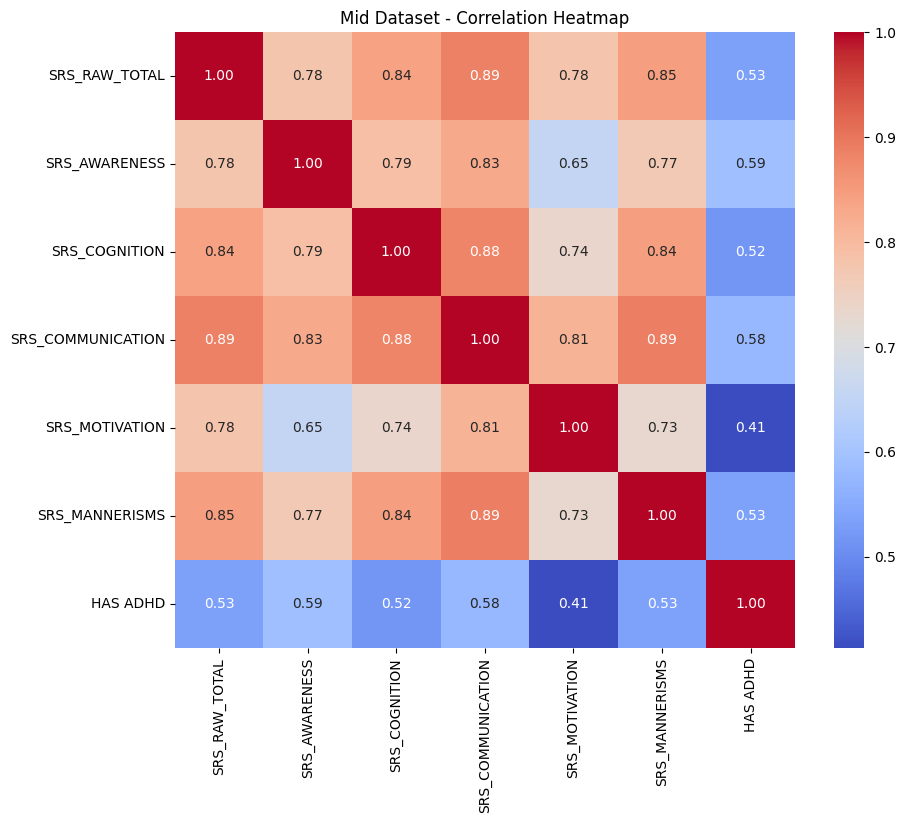

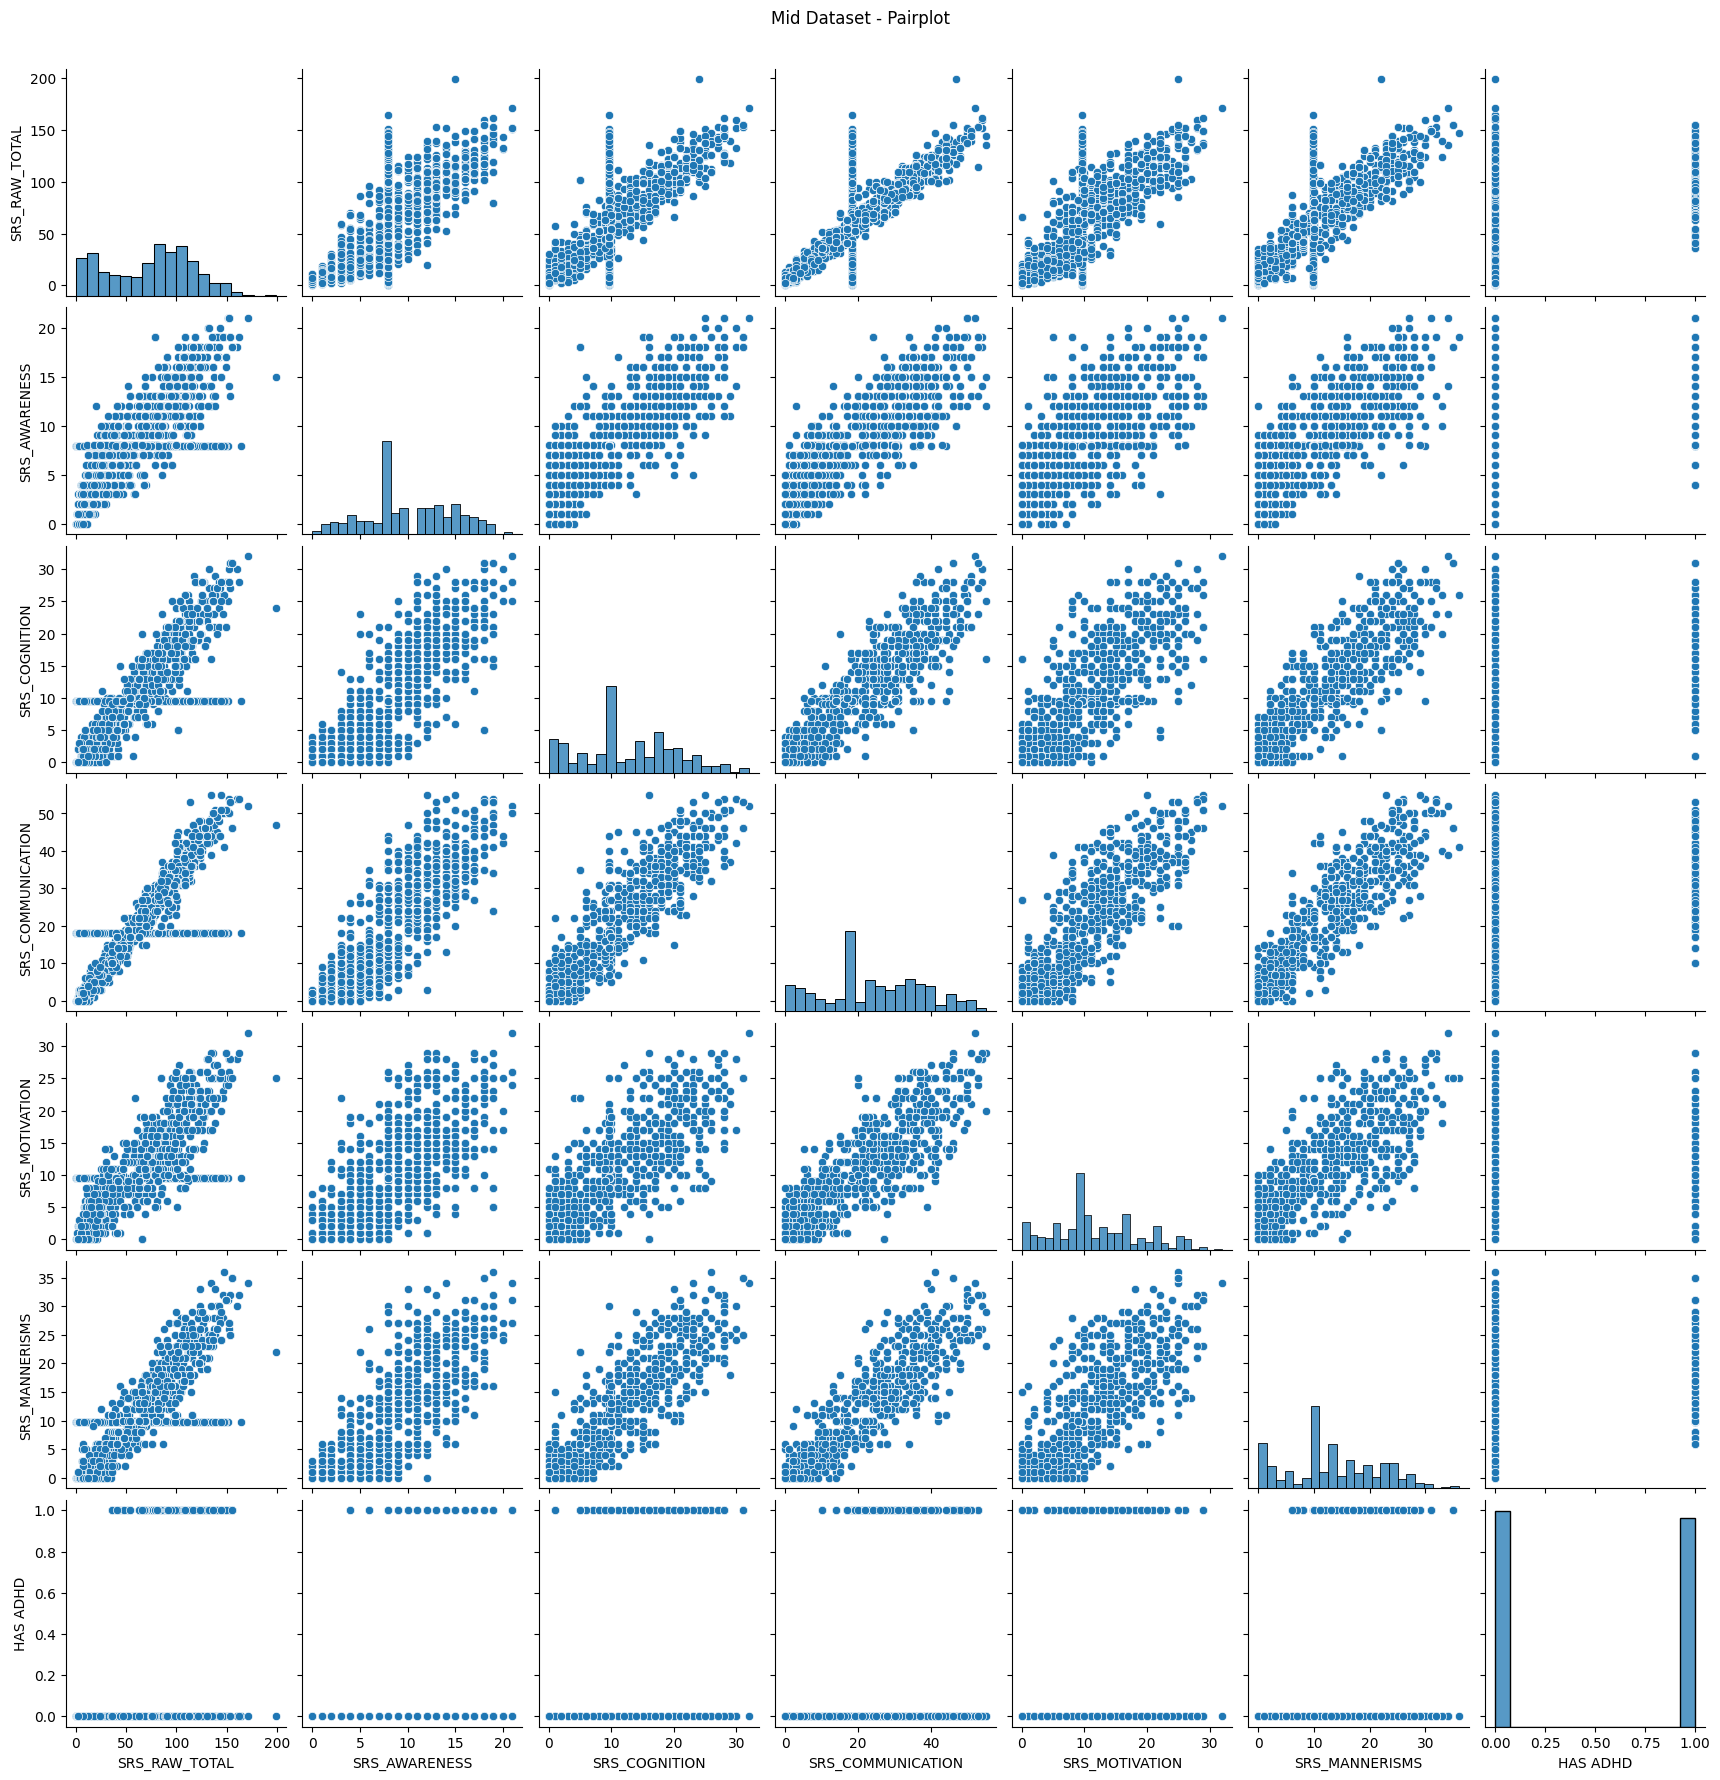


--- Small Dataset Dataset ---

Shape: (500, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB
None

First 5 rows:
   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82         

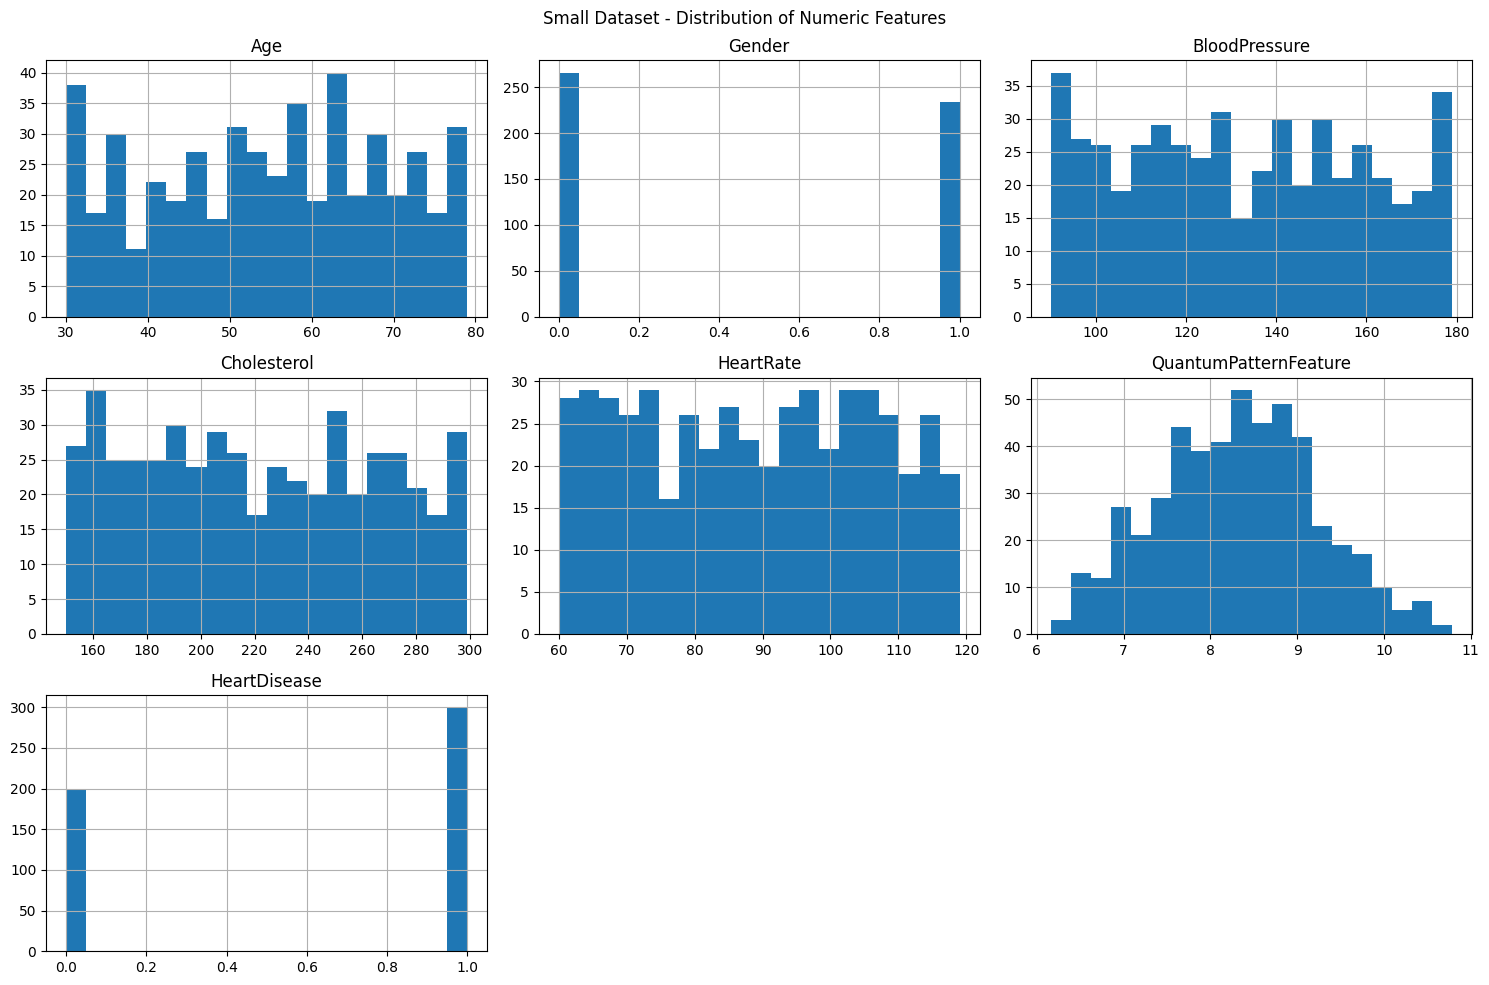

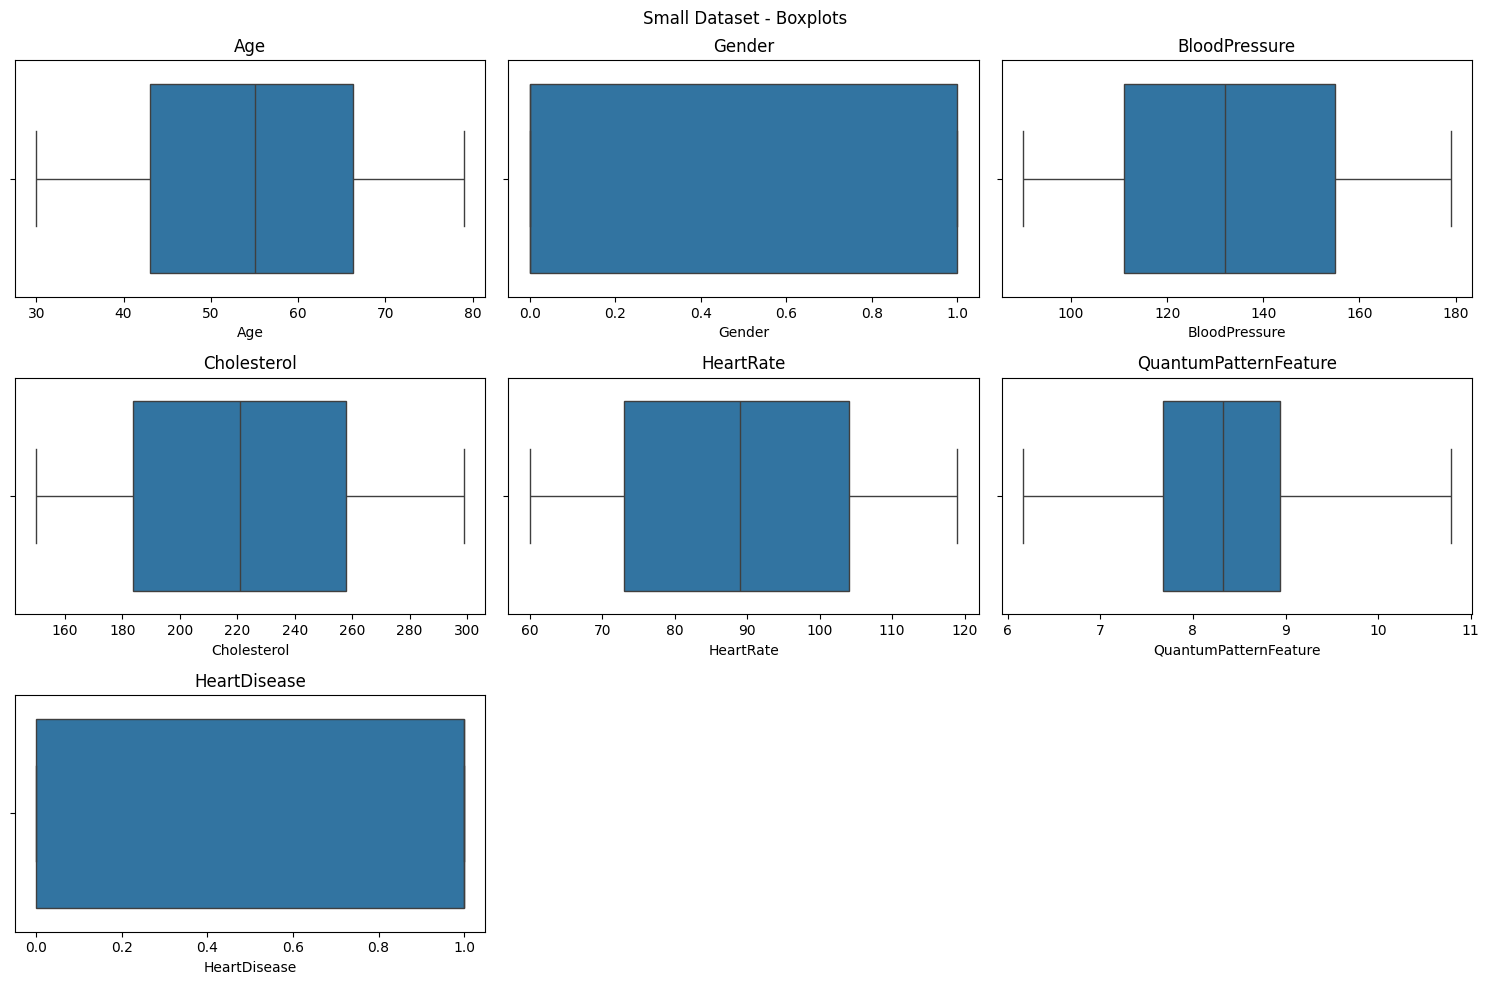

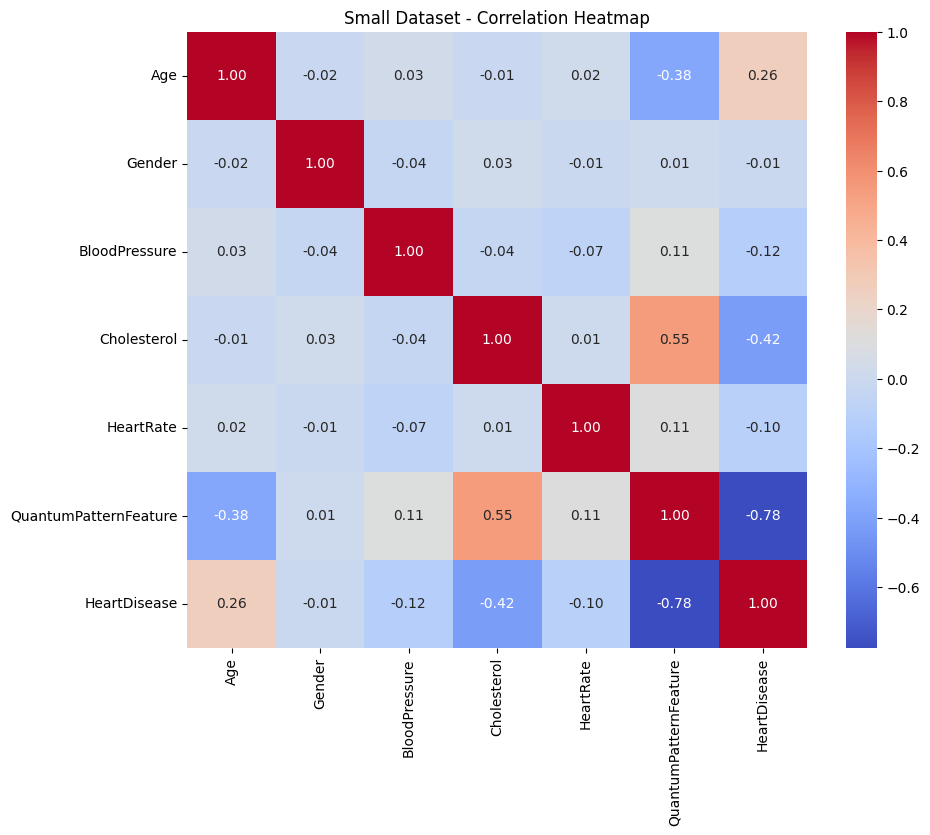

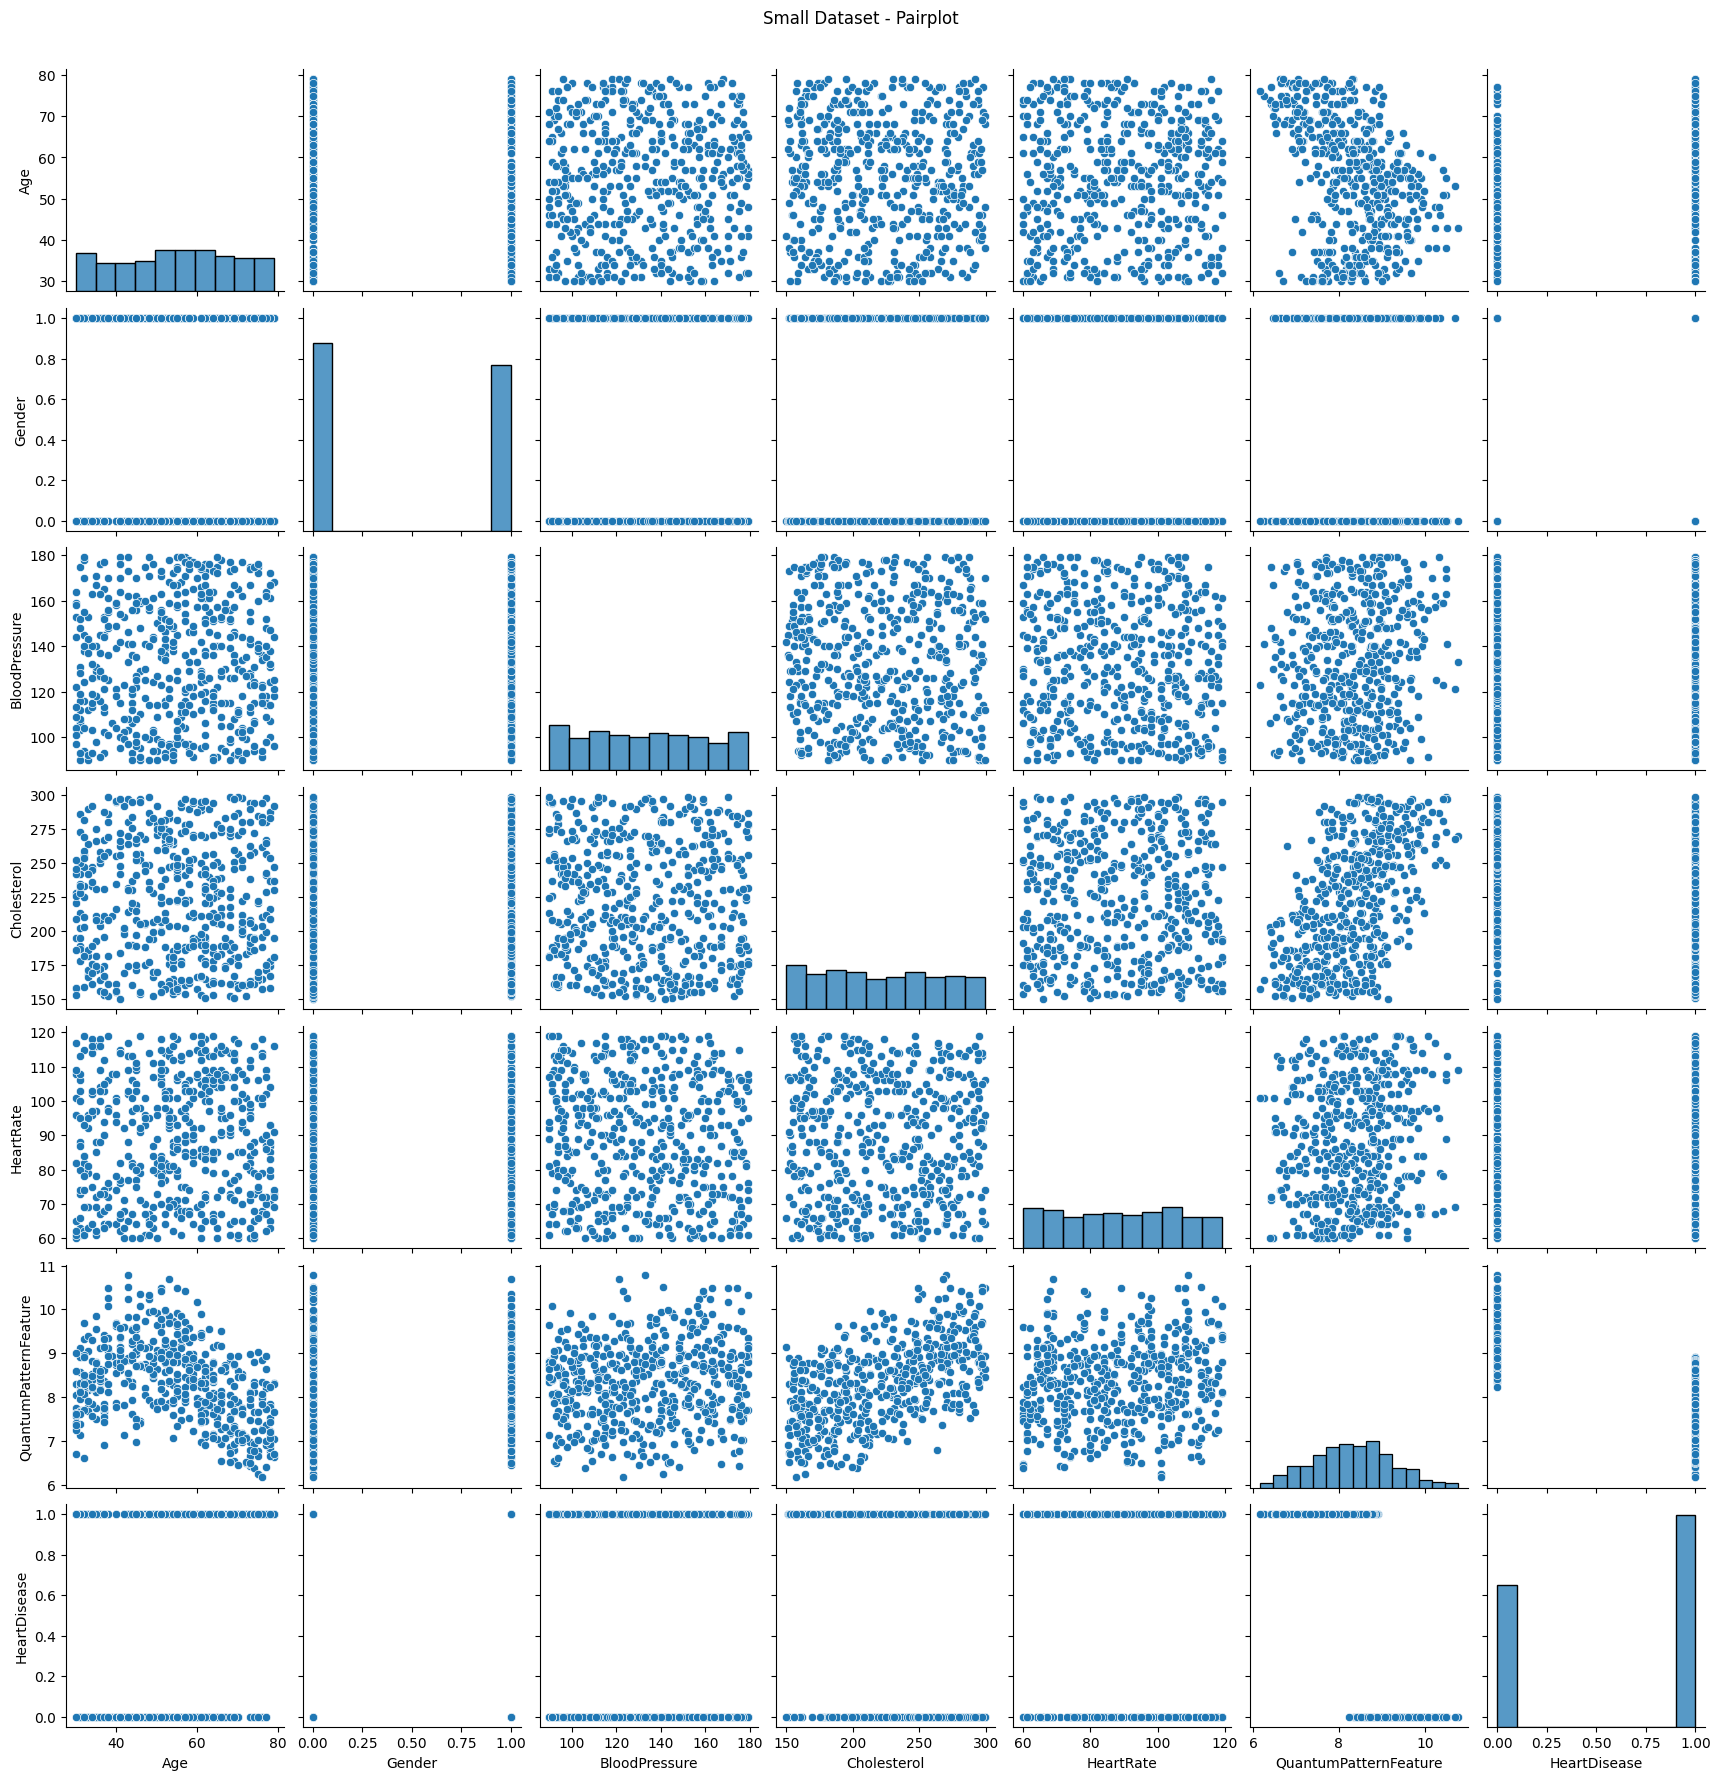

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_mid = pd.read_csv('MLsheet - SRSno-avg.csv')
df_small = pd.read_csv('Heart Prediction Quantum Dataset.csv')

# Optional: display all columns
pd.set_option('display.max_columns', None)

def basic_info(df, name):
    print(f"\n--- {name} Dataset ---")
    print("\nShape:", df.shape)
    print("\nInfo:")
    print(df.info())
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicated Rows:", df.duplicated().sum())
    print("\nColumns with Unique Values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

def categorical_summary(df):
    print("\nCategorical Value Counts:")
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\n{col}:\n{df[col].value_counts()}")

def plot_distributions(df, name):
    num_cols = df.select_dtypes(include=np.number).columns
    df[num_cols].hist(figsize=(15, 10), bins=20)
    plt.suptitle(f'{name} - Distribution of Numeric Features')
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, name):
    num_cols = df.select_dtypes(include=np.number).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot((len(num_cols)+2)//3, 3, i)
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.suptitle(f'{name} - Boxplots')
    plt.tight_layout()
    plt.show()

def correlation_heatmap(df, name):
    num_df = df.select_dtypes(include=np.number)
    if num_df.shape[1] > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'{name} - Correlation Heatmap')
        plt.show()

def run_eda(df, name):
    basic_info(df, name)
    categorical_summary(df)
    plot_distributions(df, name)
    plot_boxplots(df, name)
    correlation_heatmap(df, name)
    if df.shape[1] <= 10:  # Safe limit for pairplot
        sns.pairplot(df)
        plt.suptitle(f'{name} - Pairplot', y=1.02)
        plt.show()

# Run EDA for both datasets
run_eda(df_mid, "Mid Dataset")
run_eda(df_small, "Small Dataset")